# Analisis de ablaciones extrayendo familias

Aqui evaluan los modelos sobre los conjuntos de prueba.
- Dataset
- Loss
- F1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import os

In [2]:
!ls ../pruebas/crossFamily/weights/RNaseP/no_ResNet_2d/

ls: cannot access '../pruebas/crossFamily/weights/RNaseP/no_ResNet_2d/': No such file or directory


In [3]:
DATA_PATH = '../pruebas/crossFamily/data/'
ABLATIONS_PATH = '../pruebas/crossFamily/weights/tRNA/'
# ABLATIONS_PATH = '../pruebas/ablacion/'
CROSSFAMILY_PATH = '../pruebas/crossFamily/weights/'

# Listado de ablations y homologies
ablations = os.listdir(ABLATIONS_PATH)
print(f"Ablations: {ablations}")

cross_families = os.listdir(CROSSFAMILY_PATH)
print(f"cross families: {cross_families}")

Ablations: ['C1D_C2D', 'no_ResNet2d', 'sincfold_', '1ResNet2d', 'no_ResNet1d']
cross families: ['tRNA', 'RNaseP', 'telomerase']


In [4]:
# Inicializamos una lista para almacenar los DataFrames de los archivos test
test_logs = []

# Recorrer cada crossFamily y ablation para buscar los archivos test_*.csv
for crossFamily in cross_families:
    for ablation in ablations:
        # Ruta del subdirectorio donde se encuentran los archivos test
        test_file_path = os.path.join(CROSSFAMILY_PATH, crossFamily, ablation)
        
        # Verificamos si el directorio existe
        if os.path.isdir(test_file_path):
            # Filtrar los archivos que empiezan con 'test'
            test_files = [f for f in os.listdir(test_file_path) if f.startswith('test') and f.endswith('.csv')]
            
            # Leer y agregar cada archivo test_*.csv a la lista de DataFrames
            for test_file in test_files:
                full_path = os.path.join(test_file_path, test_file)
                try:
                    df = pd.read_csv(full_path)
                    
                    # Agregar columnas de 'ablation' y 'crossFamily'
                    df['ablation'] = ablation
                    df['crossFamily'] = crossFamily
                    
                    # Agregar el DataFrame a la lista
                    test_logs.append(df)
                    print(f"Successfully loaded {full_path}")
                except Exception as e:
                    print(f"Error loading {full_path}: {e}")

# Combinar todos los DataFrames en uno solo
if test_logs:
    combined_test_log = pd.concat(test_logs, ignore_index=True)
    print(f"Total rows in combined DataFrame: {combined_test_log.shape[0]}")
else:
    combined_test_log = pd.DataFrame()  # DataFrame vacío si no hay archivos cargados

# El DataFrame 'combined_test_log' contiene todos los datos, con las columnas 'ablation' y 'crossFamily'


Successfully loaded ../pruebas/crossFamily/weights/tRNA/C1D_C2D/test_log.csv
Successfully loaded ../pruebas/crossFamily/weights/tRNA/no_ResNet2d/test_log.csv
Successfully loaded ../pruebas/crossFamily/weights/tRNA/1ResNet2d/test_log.csv
Successfully loaded ../pruebas/crossFamily/weights/tRNA/no_ResNet1d/test_log.csv
Successfully loaded ../pruebas/crossFamily/weights/RNaseP/C1D_C2D/test_log.csv
Successfully loaded ../pruebas/crossFamily/weights/RNaseP/no_ResNet2d/test_log.csv
Successfully loaded ../pruebas/crossFamily/weights/RNaseP/1ResNet2d/test_log.csv
Successfully loaded ../pruebas/crossFamily/weights/RNaseP/no_ResNet1d/test_log.csv
Successfully loaded ../pruebas/crossFamily/weights/telomerase/C1D_C2D/test_log.csv
Successfully loaded ../pruebas/crossFamily/weights/telomerase/no_ResNet2d/test_log.csv
Successfully loaded ../pruebas/crossFamily/weights/telomerase/1ResNet2d/test_log.csv
Successfully loaded ../pruebas/crossFamily/weights/telomerase/no_ResNet1d/test_log.csv
Total rows in 

In [5]:
tRNA = pd.DataFrame({'f1': [0.685], 'f1_post': [0.685], 'loss': [0], 'ablation': ['ref_sincfold'], 'crossFamily': ['tRNA']})
telomerase = pd.DataFrame({'f1': [0.154], 'f1_post': [0.154], 'loss': [0], 'ablation': ['ref_sincfold'], 'crossFamily': ['telomerase']})
RNaseP = pd.DataFrame({'f1': [0.443], 'f1_post': [0.443], 'loss': [0], 'ablation': ['ref_sincfold'], 'crossFamily': ['RNaseP']})
combined_test_log = pd.concat([combined_test_log, tRNA, telomerase, RNaseP])
del(tRNA)
del(telomerase)
del(RNaseP)
combined_test_log

,f1,f1_post,loss,ablation,crossFamily
0,0.499,0.507,0.095,C1D_C2D,tRNA
1,0.547,0.560,0.096,no_ResNet2d,tRNA
2,0.522,0.524,0.275,1ResNet2d,tRNA
3,0.472,0.469,0.332,no_ResNet1d,tRNA
4,0.269,0.287,0.037,C1D_C2D,RNaseP
5,0.237,0.270,0.040,no_ResNet2d,RNaseP
6,0.356,0.364,0.091,1ResNet2d,RNaseP
7,0.334,0.333,0.137,no_ResNet1d,RNaseP
8,0.153,0.185,0.030,C1D_C2D,telomerase
9,0.131,0.157,0.034,no_ResNet2d,telomerase


In [6]:
combined_test_log.to_csv('../pruebas/crossFamily/data/results/test_valid_none.csv')

In [9]:
combined_test_log['ind'] = combined_test_log['ablation'] + ';' + combined_test_log['crossFamily']

In [11]:
combined_test_log.sort_values(by='crossFamily')[['ind','f1_post']].to_clipboard()

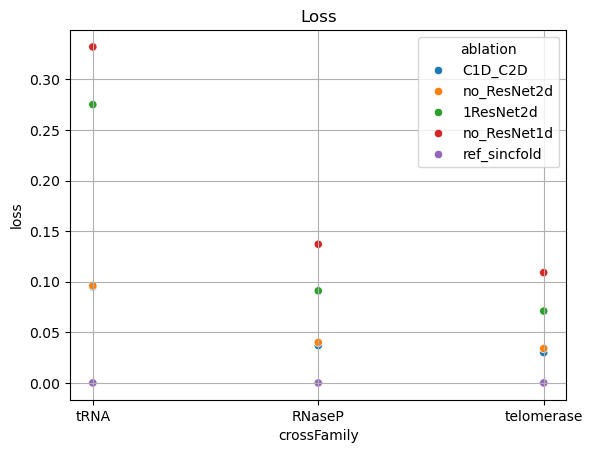

In [10]:

h = sns.scatterplot(data=combined_test_log, x='crossFamily', y='loss', hue='ablation')
h.set_title('Loss')
h.grid()

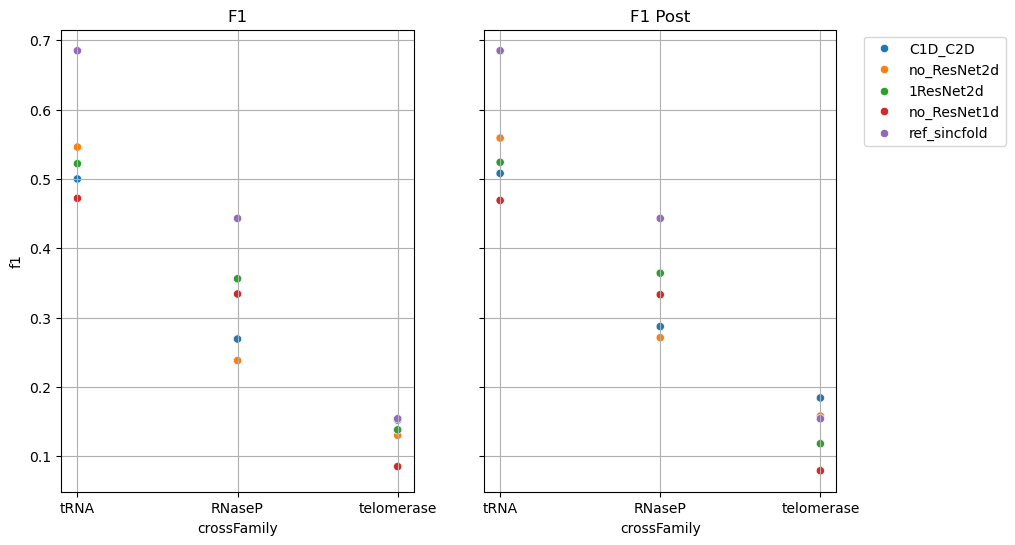

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,6), sharey=True)
f = sns.scatterplot(data=combined_test_log, x='crossFamily', y='f1', hue='ablation', ax=ax[0])
g = sns.scatterplot(data=combined_test_log, x='crossFamily', y='f1_post', hue='ablation', ax=ax[1])
ax[0].get_legend().remove()
ax[1].legend(bbox_to_anchor=(1.5,1))
for i in range(2): ax[i].grid()
f.set_title('F1')
g.set_title('F1 Post')
plt.show()


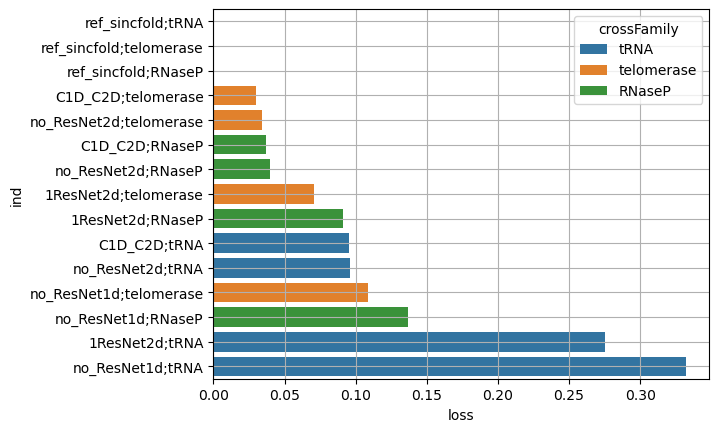

In [12]:
f = sns.barplot(data=combined_test_log.sort_values(by='loss'),  x='loss', y='ind', hue='crossFamily')
f.grid()
# f.set_xlim([0.02, 0.04])
# f.tick_params(rotation=45)

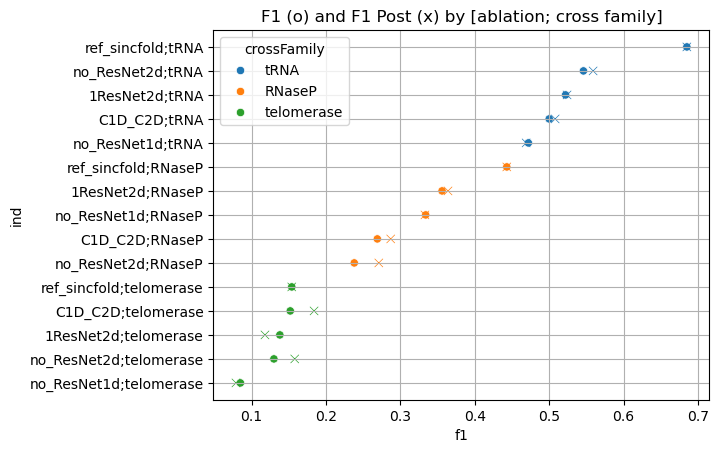

In [13]:

f = sns.scatterplot(data=combined_test_log.sort_values(by='f1', ascending=False), x='f1', y='ind', hue='crossFamily')
g = sns.scatterplot(data=combined_test_log.sort_values(by='f1', ascending=False), x='f1_post', y='ind', hue='crossFamily', marker='x', legend=False)
plt.title('F1 (o) and F1 Post (x) by [ablation; cross family]')
plt.grid()

plt.show()

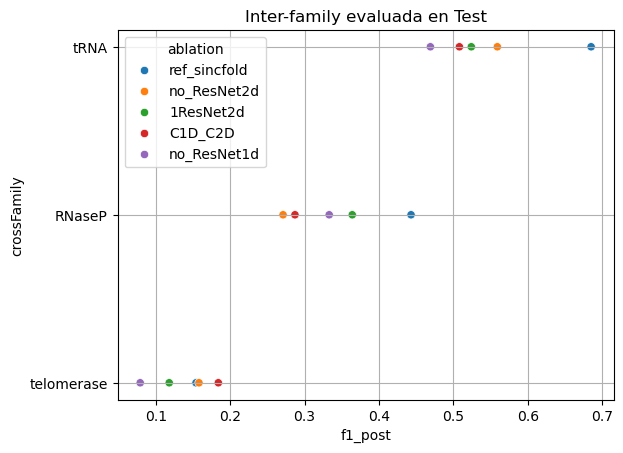

In [14]:

f = sns.scatterplot(data=combined_test_log.sort_values(by='f1', ascending=False), x='f1_post', y='crossFamily', hue='ablation')

plt.title('Inter-family evaluada en Test')
plt.grid()

plt.show()

<Axes: ylabel='name'>

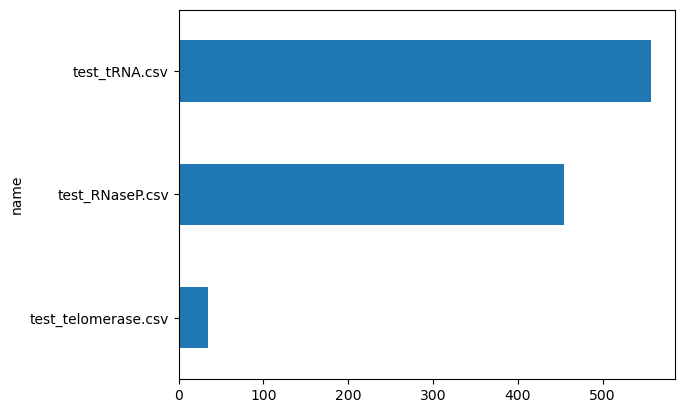

In [15]:
df = pd.concat(
    [pd.read_csv(os.path.join(DATA_PATH, data)).reset_index(drop=True).assign(name=data)
     for data in os.listdir(DATA_PATH) if data.startswith('test')]
).reset_index(drop=True)
df.groupby('name')['id'].agg('count').sort_values().plot(kind='barh')